In [1]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM
from tensorflow.keras.layers import Dense, Dropout
import pandas as pd
from matplotlib import pyplot as plt
from sklearn.preprocessing import StandardScaler

#from datetime import datetime

In [2]:
df = pd.read_csv('Train.csv')
df.head()
df=df.head(100)
print(df)
dftest = pd.read_csv('Train.csv')
dftest = dftest.head(150) 



          Date    Stock  liabilities      equity  total_assets   
0   31-07-2006  Stock 1   625.898686  925.086518   1550.985204  \
1   31-08-2006  Stock 1   407.387467  903.249093   1310.636561   
2   29-09-2006  Stock 1   464.069890  602.668832   1066.738722   
3   31-10-2006  Stock 1   855.854937  391.375369   1247.230306   
4   30-11-2006  Stock 1   453.954969  956.490566   1410.445534   
..         ...      ...          ...         ...           ...   
95  30-06-2014  Stock 1   463.778881  418.742522    882.521404   
96  31-07-2014  Stock 1   853.981038  657.102350   1511.083387   
97  29-08-2014  Stock 1   753.298900  365.554744   1118.853644   
98  30-09-2014  Stock 1   338.198651  967.781296   1305.979947   
99  31-10-2014  Stock 1   115.408655  928.298245   1043.706901   

    current_assets  current_liabilities  total_revenue  net_income   dividend   
0       675.789906           555.931328     548.488451  251.282553  68.184030  \
1      1023.110983          1295.186240     5

In [3]:
cols = list(df)[2:12]
print(cols) 


['liabilities', 'equity', 'total_assets', 'current_assets', 'current_liabilities', 'total_revenue', 'net_income', 'dividend', 'shares_outstanding', 'price']


In [4]:
df_for_training = df[cols].astype(float)
df_for_test = dftest[cols].astype(float)
#converts all element to the float

In [5]:
scaler = StandardScaler()
scaler = scaler.fit(df_for_training)
df_for_training_scaled = scaler.transform(df_for_training)
print(df_for_training_scaled)

[[ 0.27828033  1.45740534  1.32503454  0.28146144 -0.24679376 -0.01594498
   1.30764769  1.64067001 -0.30042164 -2.0573656 ]
 [-0.59053793  1.37978254  0.66155033  1.64629957  2.32218425 -0.14118655
   1.03510836  0.73932626 -0.0998116  -1.79143166]
 [-0.36516404  0.31134696 -0.01173147  0.41476093 -0.09810154 -0.17666447
   0.57454962  0.27402275  1.53834284 -1.61977539]
 [ 1.19260495 -0.43971185  0.48651689  0.18003673  0.37060135  0.15388605
  -0.73871867 -0.72750085 -1.06786367 -1.43834193]
 [-0.40538178  1.56903344  0.93707374  2.0097244   1.82555369  1.47604077
  -2.18743448 -0.72750085 -0.4568961  -1.48229856]
 [ 1.43805119 -1.15326152  0.10277762  0.33893249 -0.01910202  0.35316105
   1.67932469  1.89377255 -1.26143961 -1.62423513]
 [ 0.70249639 -1.46817953 -0.65246965  0.04257211  0.0707568   0.28762683
  -0.73492549 -0.72750085 -0.87752895 -1.53444177]
 [-1.50778641 -0.88062737 -1.73072466 -1.33306471 -1.0258915   1.27625406
   2.45862233  3.79817809  0.00383807 -1.67428102]


In [6]:
scaler = StandardScaler()
scaler = scaler.fit(df_for_test)
df_for_test_scaled = scaler.transform(df_for_test)
print(len(df_for_test_scaled))
print('testX shape == {}.'.format(df_for_test_scaled.shape))

150
testX shape == (150, 10).


In [7]:
trainX = []
trainY = []


In [8]:
n_future = 1   # Number of days we want to look into the future based on the past days.
n_past = 14 # Number of past days we want to use to predict the future.
print(len(df_for_training_scaled))

100


In [9]:
for i in range(n_past, len(df_for_training_scaled) - n_future +1):
    trainX.append(df_for_training_scaled[i - n_past:i, 0:df_for_training.shape[1]])
    trainY.append(df_for_training_scaled[i + n_future - 1:i + n_future, 9])

trainX, trainY = np.array(trainX), np.array(trainY)

print('trainX shape == {}.'.format(trainX.shape))
print('trainY shape == {}.'.format(trainY.shape))

trainX shape == (86, 14, 10).
trainY shape == (86, 1).


In [10]:


testX = []
testY = []

for i in range(n_past, len(df_for_test_scaled) - n_future + 1):
    testX.append(df_for_test_scaled[i - n_past:i, 0:df_for_test.shape[1]])
    testY.append(df_for_test_scaled[i + n_future - 1:i + n_future, 9])

testX = np.array(testX)
testY = np.array(testY)

print('testX shape == {}.'.format(testX.shape))
print('testY shape == {}.'.format(testY.shape))


testX shape == (136, 14, 10).
testY shape == (136, 1).


In [11]:
df_for_training_scaled

array([[ 0.27828033,  1.45740534,  1.32503454,  0.28146144, -0.24679376,
        -0.01594498,  1.30764769,  1.64067001, -0.30042164, -2.0573656 ],
       [-0.59053793,  1.37978254,  0.66155033,  1.64629957,  2.32218425,
        -0.14118655,  1.03510836,  0.73932626, -0.0998116 , -1.79143166],
       [-0.36516404,  0.31134696, -0.01173147,  0.41476093, -0.09810154,
        -0.17666447,  0.57454962,  0.27402275,  1.53834284, -1.61977539],
       [ 1.19260495, -0.43971185,  0.48651689,  0.18003673,  0.37060135,
         0.15388605, -0.73871867, -0.72750085, -1.06786367, -1.43834193],
       [-0.40538178,  1.56903344,  0.93707374,  2.0097244 ,  1.82555369,
         1.47604077, -2.18743448, -0.72750085, -0.4568961 , -1.48229856],
       [ 1.43805119, -1.15326152,  0.10277762,  0.33893249, -0.01910202,
         0.35316105,  1.67932469,  1.89377255, -1.26143961, -1.62423513],
       [ 0.70249639, -1.46817953, -0.65246965,  0.04257211,  0.0707568 ,
         0.28762683, -0.73492549, -0.72750085

In [12]:
trainY

array([[-0.90433402],
       [-1.09708965],
       [-1.01173716],
       [-1.10483972],
       [-1.14784081],
       [-1.05107814],
       [-0.90092041],
       [-0.98488025],
       [-1.17145511],
       [-1.39315942],
       [-1.32621932],
       [-1.25884446],
       [-1.16464735],
       [-1.11630631],
       [-1.06613716],
       [-1.01146016],
       [-0.77899349],
       [-0.73556717],
       [-0.55389699],
       [-0.35172622],
       [-0.0474895 ],
       [-0.02863565],
       [-0.09285671],
       [-0.2201632 ],
       [-0.36877255],
       [-0.32899696],
       [-0.29876013],
       [-0.18807496],
       [-0.14020051],
       [-0.17417545],
       [-0.06113968],
       [-0.13731752],
       [-0.07890593],
       [ 0.11843419],
       [ 0.18907742],
       [ 0.19302087],
       [ 0.26452214],
       [ 0.39466352],
       [ 0.16247031],
       [ 0.13707345],
       [ 0.24659377],
       [ 0.34307748],
       [ 0.41195321],
       [ 0.52565941],
       [ 0.45146347],
       [ 0

In [13]:
model = Sequential()
model.add(LSTM(64, activation='relu', input_shape=(trainX.shape[1], trainX.shape[2]), return_sequences=True)) 
model.add(LSTM(32, activation='relu', return_sequences=False))
model.add(Dropout(0.2))
model.add(Dense(trainY.shape[1]))

model.compile(optimizer='adam', loss='mse')
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 14, 64)            19200     
                                                                 
 lstm_1 (LSTM)               (None, 32)                12416     
                                                                 
 dropout (Dropout)           (None, 32)                0         
                                                                 
 dense (Dense)               (None, 1)                 33        
                                                                 
Total params: 31,649
Trainable params: 31,649
Non-trainable params: 0
_________________________________________________________________


In [14]:
history = model.fit(trainX, trainY, epochs=5, batch_size=3, validation_split=0.1, verbose=1)

Epoch 1/5
26/26 [==============================] - 7s 67ms/step - loss: 0.5020 - val_loss: 0.5503
Epoch 2/5
26/26 [==============================] - 1s 23ms/step - loss: 0.1421 - val_loss: 0.4596
Epoch 3/5
26/26 [==============================] - 1s 24ms/step - loss: 0.1187 - val_loss: 0.0431
Epoch 4/5
26/26 [==============================] - 1s 25ms/step - loss: 0.0820 - val_loss: 0.0178
Epoch 5/5
26/26 [==============================] - 1s 24ms/step - loss: 0.0495 - val_loss: 0.0643


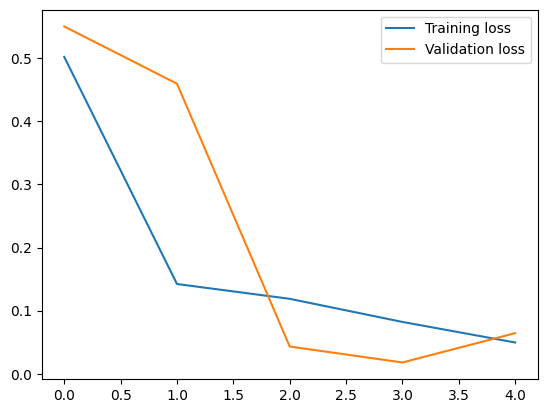

In [15]:
plt.plot(history.history['loss'], label='Training loss')
plt.plot(history.history['val_loss'], label='Validation loss')
plt.legend()

In [16]:
from pandas.tseries.holiday import USFederalHolidayCalendar
from pandas.tseries.offsets import CustomBusinessDay
us_bd = CustomBusinessDay(calendar=USFederalHolidayCalendar())

In [17]:


train_dates = pd.to_datetime(dftest['Date'])
print(train_dates.tail(50)) 

100   2014-11-28
101   2014-12-31
102   2015-01-30
103   2015-02-27
104   2015-03-31
105   2015-04-30
106   2015-05-29
107   2015-06-30
108   2015-07-31
109   2015-08-31
110   2015-09-30
111   2015-10-30
112   2015-11-30
113   2015-12-31
114   2016-01-29
115   2016-02-29
116   2016-03-31
117   2016-04-29
118   2016-05-31
119   2016-06-30
120   2016-07-29
121   2016-08-31
122   2016-09-30
123   2016-10-31
124   2016-11-30
125   2016-12-30
126   2017-01-31
127   2017-02-28
128   2017-03-31
129   2017-04-28
130   2017-05-31
131   2017-06-30
132   2017-07-31
133   2017-08-31
134   2017-09-29
135   2017-10-31
136   2017-11-30
137   2017-12-29
138   2018-01-31
139   2018-02-28
140   2018-03-30
141   2018-04-30
142   2018-05-31
143   2018-06-29
144   2018-07-31
145   2018-08-31
146   2018-09-28
147   2018-10-31
148   2018-11-30
149   2018-12-31
Name: Date, dtype: datetime64[ns]


C:\Users\USER\AppData\Local\Temp\ipykernel_21100\3562957283.py:1: UserWarning: Parsing dates in %d-%m-%Y format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  train_dates = pd.to_datetime(dftest['Date'])


In [18]:
prediction = model.predict(testX[-50:]) 

2/2 [==============================] - 1s 5ms/step


In [19]:
prediction_copies = np.repeat(prediction, df_for_test_scaled.shape[1], axis=-1)
y_pred_future = scaler.inverse_transform(prediction_copies)[:,9]
print(y_pred_future)

[125.09244  125.22463  125.2517   125.54421  125.79501  126.09736
 126.225075 126.5063   126.98436  127.06433  127.15855  127.28983
 127.36803  127.55044  127.58122  127.20855  126.906555 126.94527
 126.8504   126.6213   126.26124  126.186195 126.20529  126.61886
 126.823296 126.39703  125.93645  126.28559  126.23668  125.68133
 125.29597  125.44228  125.4851   125.360695 124.85396  124.55517
 124.424576 123.861336 123.441284 123.69157  124.294716 124.589195
 124.46047  124.19487  123.79543  123.39894  123.55645  123.64037
 123.66964  123.36356 ]


In [20]:
dftest1 = dftest.tail(50)
forecast_dates = dftest1['Date'].tolist()
df_forecast = pd.DataFrame({'Date':np.array(forecast_dates), 'price':y_pred_future})
df_forecast['Date']=pd.to_datetime(df_forecast['Date'])

C:\Users\USER\AppData\Local\Temp\ipykernel_21100\4133277390.py:4: UserWarning: Parsing dates in %d-%m-%Y format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  df_forecast['Date']=pd.to_datetime(df_forecast['Date'])


In [21]:
original = df[['Date', 'price']]
original['Date']=pd.to_datetime(original['Date'])
original

C:\Users\USER\AppData\Local\Temp\ipykernel_21100\1150982956.py:2: UserWarning: Parsing dates in %d-%m-%Y format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  original['Date']=pd.to_datetime(original['Date'])
C:\Users\USER\AppData\Local\Temp\ipykernel_21100\1150982956.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  original['Date']=pd.to_datetime(original['Date'])


,Date,price
0,2006-07-31,100.000000
1,2006-08-31,101.924169
2,2006-09-29,103.166191
3,2006-10-31,104.478956
4,2006-11-30,104.160907
...,...,...
95,2014-06-30,125.186977
96,2014-07-31,125.995406
97,2014-08-29,126.533175
98,2014-09-30,126.158370


In [22]:
df_forecast

,Date,price
0,2014-11-28,125.092438
1,2014-12-31,125.224632
2,2015-01-30,125.251701
3,2015-02-27,125.544212
4,2015-03-31,125.795013
5,2015-04-30,126.097359
6,2015-05-29,126.225075
7,2015-06-30,126.506302
8,2015-07-31,126.984360
9,2015-08-31,127.064331


<Axes: xlabel='Date'>

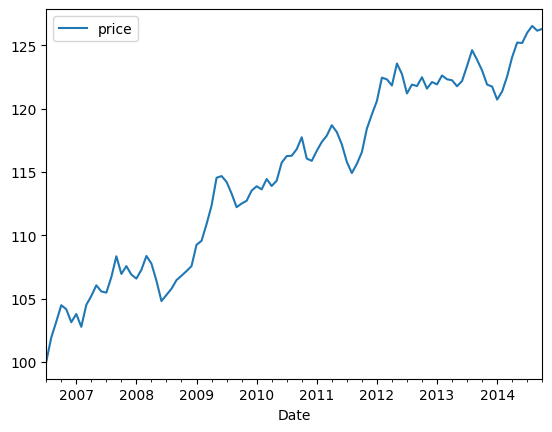

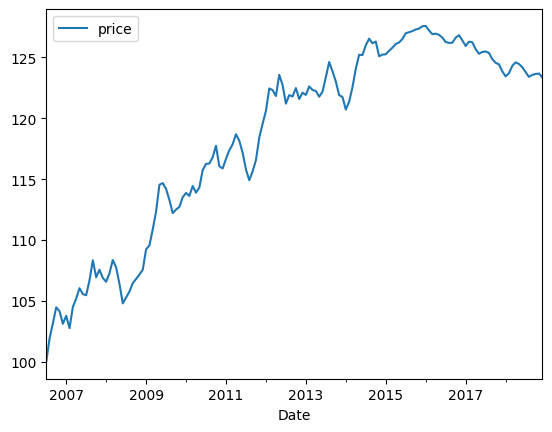

In [23]:
original.plot(x='Date',y='price')
original= pd.concat([original,df_forecast],axis=0)
original.plot(x='Date',y='price')
#f_forecast.plot(x='Date',y='price')

In [24]:

y_true = dftest1['price']
print(y_true)

100    127.598724
101    127.200868
102    126.062139
103    125.271093
104    124.441462
105    125.029381
106    124.899652
107    126.097677
108    126.727225
109    127.651581
110    127.082330
111    126.547098
112    125.310593
113    125.902638
114    126.918484
115    126.573487
116    125.589566
117    126.408821
118    126.158080
119    125.904781
120    125.628819
121    125.925157
122    125.414895
123    126.424982
124    126.261550
125    125.115552
126    124.302813
127    125.061373
128    126.133621
129    124.977239
130    122.951050
131    122.938914
132    123.260215
133    122.959089
134    122.390991
135    121.565300
136    123.191378
137    123.154387
138    122.562211
139    123.719922
140    125.547720
141    125.070057
142    123.587449
143    123.373934
144    122.508423
145    120.895608
146    120.817217
147    121.541253
148    120.380297
149    119.687371
Name: price, dtype: float64


In [25]:
dates = dftest1['Date']
    
df_real = pd.DataFrame({'Date':np.array(dates), 'price':y_true})


In [26]:
df_real

,Date,price
100,28-11-2014,127.598724
101,31-12-2014,127.200868
102,30-01-2015,126.062139
103,27-02-2015,125.271093
104,31-03-2015,124.441462
105,30-04-2015,125.029381
106,29-05-2015,124.899652
107,30-06-2015,126.097677
108,31-07-2015,126.727225
109,31-08-2015,127.651581


In [27]:
def directional_accuracy(y_true, y_pred):
    y_true_direction = np.sign(np.diff(y_true))
    y_pred_direction = np.sign(np.diff(y_pred))
    da = np.mean(y_true_direction == y_pred_direction)
    return da
directional_accuracy(y_true ,y_pred_future )

0.6530612244897959